EDA: Análisis exploratorio de los datos

En este EDA, analizaremos los datos buscando patrones que nos permitan mejorar nuestro proyecto.

In [14]:
#importo las librerias a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [4]:
#Cargo los datos
df_steam_games = pd.read_parquet('Dataset/api-dataset/processed_steam_games.parquet')
df_users_reviews = pd.read_parquet('Dataset/api-dataset/processed_user_reviews.parquet')
df_users_items = pd.read_parquet('Dataset/api-dataset/processed_user_items.parquet')


In [5]:
# Visualizo los datos correspondientes a df_steam_games
df_steam_games.head(3)

,publisher,genres,app_name,title,release_date,tags,specs,price,early_access,id,developer,release_year
88310,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",[Single-player],4.99,0.0,761140.0,Kotoshiro,2018
88311,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...","[Single-player, Multi-player, Online Multi-Pla...",0.00,0.0,643980.0,Secret Level SRL,2018
88312,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...","[Single-player, Multi-player, Online Multi-Pla...",NaN,0.0,670290.0,Poolians.com,2017


In [6]:
#Vemos las columnas y registros
df_steam_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22496 entries, 88310 to 120443
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   publisher     22496 non-null  object        
 1   genres        22496 non-null  object        
 2   app_name      22496 non-null  object        
 3   title         22496 non-null  object        
 4   release_date  22496 non-null  datetime64[ns]
 5   tags          22496 non-null  object        
 6   specs         22496 non-null  object        
 7   price         21530 non-null  float64       
 8   early_access  22496 non-null  float64       
 9   id            22496 non-null  float64       
 10  developer     22496 non-null  object        
 11  release_year  22496 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(1), object(7)
memory usage: 2.1+ MB


In [7]:
#Observo la cantidad de datos nulos
df_steam_games.isnull().sum()

publisher         0
genres            0
app_name          0
title             0
release_date      0
tags              0
specs             0
price           966
early_access      0
id                0
developer         0
release_year      0
dtype: int64

In [8]:
#Elimino los nulos de la columna price
df_steam_games_cleaned = df_steam_games.dropna(subset=['price'])

In [9]:
df_steam_games = df_steam_games_cleaned

In [10]:
df_steam_games.isnull().sum()

publisher       0
genres          0
app_name        0
title           0
release_date    0
tags            0
specs           0
price           0
early_access    0
id              0
developer       0
release_year    0
dtype: int64

In [17]:
#Verifico la existencia de datos duplicados

# Aplico una función a cada elemento del DataFrame usando applymap para convertir numpy arrays a tuplas
df_steam_games = df_steam_games.apply(lambda col: col.map(lambda x: tuple(x) if isinstance(x, np.ndarray) else x))

# Identificar duplicados basados en todas las columnas
duplicated = df_steam_games[df_steam_games.duplicated(keep=False)]

duplicated

,publisher,genres,app_name,title,release_date,tags,specs,price,early_access,id,developer,release_year
102204,Bethesda Softworks,"(Action,)",Wolfenstein II: The New Colossus,Wolfenstein II: The New Colossus,2017-10-26,"(Action, FPS, Gore, Violent, Alternate History...","(Single-player, Steam Achievements, Full contr...",59.99,0.0,612880.0,Machine Games,2017
102883,Bethesda Softworks,"(Action,)",Wolfenstein II: The New Colossus,Wolfenstein II: The New Colossus,2017-10-26,"(Action, FPS, Gore, Violent, Alternate History...","(Single-player, Steam Achievements, Full contr...",59.99,0.0,612880.0,Machine Games,2017


In [20]:
# Elimino duplicados 
df_steam_games_ = df_steam_games.drop_duplicates()

df_steam_games = df_steam_games_

df_steam_games.head(3)

,publisher,genres,app_name,title,release_date,tags,specs,price,early_access,id,developer,release_year
88310,Kotoshiro,"(Action, Casual, Indie, Simulation, Strategy)",Lost Summoner Kitty,Lost Summoner Kitty,2018-01-04,"(Strategy, Action, Indie, Casual, Simulation)","(Single-player,)",4.99,0.0,761140.0,Kotoshiro,2018
88311,"Making Fun, Inc.","(Free to Play, Indie, RPG, Strategy)",Ironbound,Ironbound,2018-01-04,"(Free to Play, Strategy, Indie, RPG, Card Game...","(Single-player, Multi-player, Online Multi-Pla...",0.00,0.0,643980.0,Secret Level SRL,2018
88313,彼岸领域,"(Action, Adventure, Casual)",弹炸人2222,弹炸人2222,2017-12-07,"(Action, Adventure, Casual)","(Single-player,)",0.99,0.0,767400.0,彼岸领域,2017


In [19]:
# Visualizo los datos correspondientes a df_users_reviews
df_users_reviews.head(3)

,user_id,user_url,item_id,recommend,sentiment_analysis
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,1250,True,2
1,76561197970982479,http://steamcommunity.com/profiles/76561197970...,22200,True,2
2,76561197970982479,http://steamcommunity.com/profiles/76561197970...,43110,True,2


In [14]:
#Vemos las columnas y registros
df_users_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61078 entries, 0 to 61077
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             61078 non-null  object
 1   user_url            61078 non-null  object
 2   item_id             61078 non-null  int32 
 3   recommend           61078 non-null  bool  
 4   sentiment_analysis  61078 non-null  int64 
dtypes: bool(1), int32(1), int64(1), object(2)
memory usage: 1.7+ MB


In [15]:
#Observo la cantidad de datos nulos
df_users_reviews.isnull().sum()

user_id               0
user_url              0
item_id               0
recommend             0
sentiment_analysis    0
dtype: int64

In [21]:
#Verifico la existencia de datos duplicados

# Aplico una función a cada elemento del DataFrame usando applymap para convertir numpy arrays a tuplas
df_users_reviews = df_users_reviews.apply(lambda col: col.map(lambda x: tuple(x) if isinstance(x, np.ndarray) else x))

# Identificar duplicados basados en todas las columnas
duplicated = df_users_reviews[df_users_reviews.duplicated(keep=False)]

duplicated

,user_id,user_url,item_id,recommend,sentiment_analysis
31,76561198156664158,http://steamcommunity.com/profiles/76561198156...,252950,True,2
32,76561198156664158,http://steamcommunity.com/profiles/76561198156...,252950,True,2
116,Rivtex,http://steamcommunity.com/id/Rivtex,298630,True,1
117,Rivtex,http://steamcommunity.com/id/Rivtex,298630,True,1
178,76561198094224872,http://steamcommunity.com/profiles/76561198094...,72850,True,2
...,...,...,...,...,...
46206,76561198092022514,http://steamcommunity.com/profiles/76561198092...,218620,True,1
46207,76561198092022514,http://steamcommunity.com/profiles/76561198092...,261820,True,0
46208,76561198092022514,http://steamcommunity.com/profiles/76561198092...,224260,True,1
46352,SuchGayMuchWow,http://steamcommunity.com/id/SuchGayMuchWow,730,True,1


In [22]:
# Elimino duplicados 
df_users_reviews_ = df_users_reviews.drop_duplicates()

df_users_reviews = df_users_reviews_

df_users_reviews.head(3)

,user_id,user_url,item_id,recommend,sentiment_analysis
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,1250,True,2
1,76561197970982479,http://steamcommunity.com/profiles/76561197970...,22200,True,2
2,76561197970982479,http://steamcommunity.com/profiles/76561197970...,43110,True,2


In [16]:
# Visualizo los datos correspondientes a df_users_items
df_users_items.head(3)

,user_id,items_count,steam_id,user_url,item_id,item_name,playtime_forever,playtime_2weeks
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,10.0,Counter-Strike,6,0.0
1,js41637,888,76561198035864385,http://steamcommunity.com/id/js41637,20.0,Team Fortress Classic,0,0.0
2,evcentric,137,76561198007712555,http://steamcommunity.com/id/evcentric,30.0,Day of Defeat,7,0.0


In [17]:
#Vemos las columnas y registros
df_users_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88310 entries, 0 to 88309
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           88310 non-null  object 
 1   items_count       88310 non-null  int64  
 2   steam_id          88310 non-null  object 
 3   user_url          88310 non-null  object 
 4   item_id           88176 non-null  float64
 5   item_name         88176 non-null  object 
 6   playtime_forever  88310 non-null  int32  
 7   playtime_2weeks   88176 non-null  float64
dtypes: float64(2), int32(1), int64(1), object(4)
memory usage: 5.1+ MB


In [18]:
#Observo la cantidad de datos nulos
df_users_items.isnull().sum()

user_id               0
items_count           0
steam_id              0
user_url              0
item_id             134
item_name           134
playtime_forever      0
playtime_2weeks     134
dtype: int64

In [19]:
#Limpio los datos nulos de las columnas correspondientes
df_users_items_cleaned = df_users_items.dropna(subset=['item_id', 'item_name', 'playtime_2weeks'])


In [20]:
df_users_items = df_users_items_cleaned

In [21]:
df_users_items.isnull().sum()

user_id             0
items_count         0
steam_id            0
user_url            0
item_id             0
item_name           0
playtime_forever    0
playtime_2weeks     0
dtype: int64

In [23]:
#Verifico la existencia de datos duplicados

# Aplico una función a cada elemento del DataFrame usando applymap para convertir numpy arrays a tuplas
df_users_items = df_users_items.apply(lambda col: col.map(lambda x: tuple(x) if isinstance(x, np.ndarray) else x))

# Identificar duplicados basados en todas las columnas
duplicated = df_users_items[df_users_items.duplicated(keep=False)]

duplicated

,user_id,items_count,steam_id,user_url,item_id,item_name,playtime_forever,playtime_2weeks


Nube de palabras

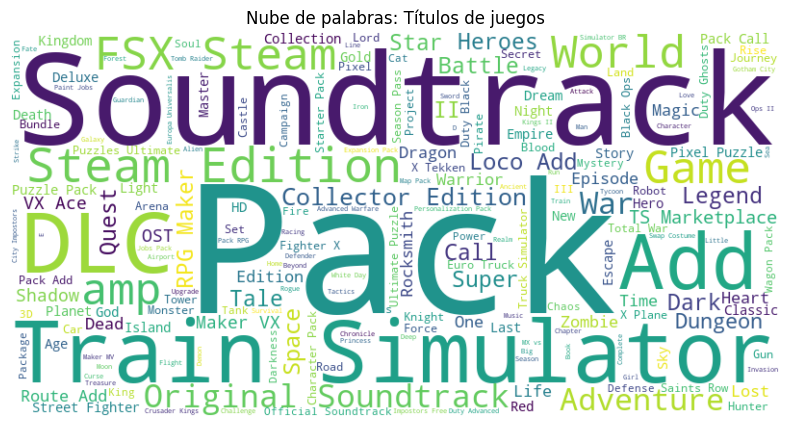

In [31]:
# Concateno  todos los títulos de juegos en una sola cadena
titles_text = ' '.join(df_steam_games['title'])

# Creo la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(titles_text)

# Muestro la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras: Títulos de juegos')
plt.show()


Visualización de la distribución de variables numéricas buscando posibles outliers

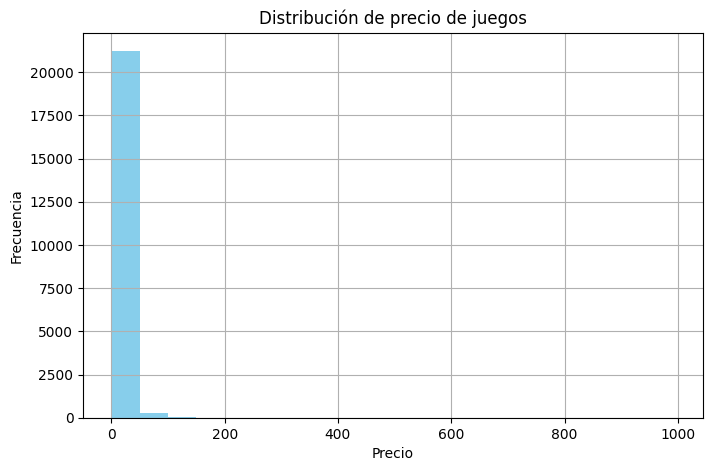

In [32]:
# Visualizar la distribución de precios de juegos
plt.figure(figsize=(8, 5))
plt.hist(df_steam_games['price'].dropna(), bins=20, color='skyblue')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Distribución de precio de juegos')
plt.grid(True)
plt.show()

Matriz de correlaciones

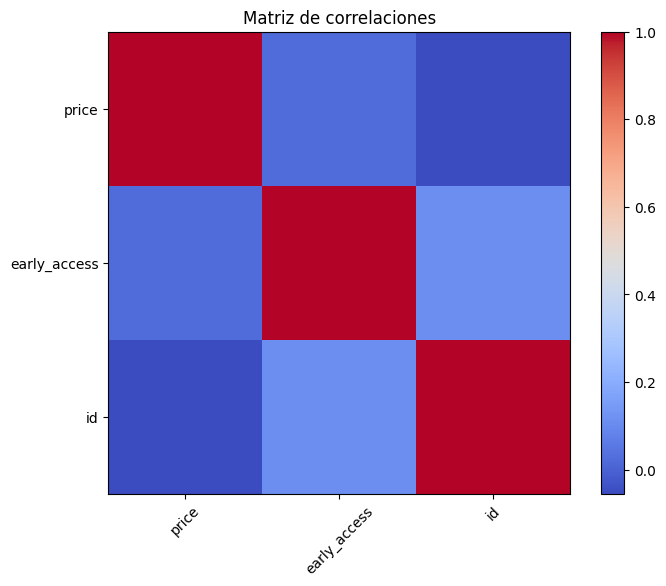

In [33]:
# Selecciono las variables numéricas del dataframe df_steam_games para hacer la matriz de correlación
numeric_columns = df_steam_games.select_dtypes(include=['float64', 'int64'])

# Calculo la matriz de correlación
correlation_matrix = numeric_columns.corr()

# Visualizo la matriz de correlación como un mapa de calor
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Matriz de correlaciones')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()


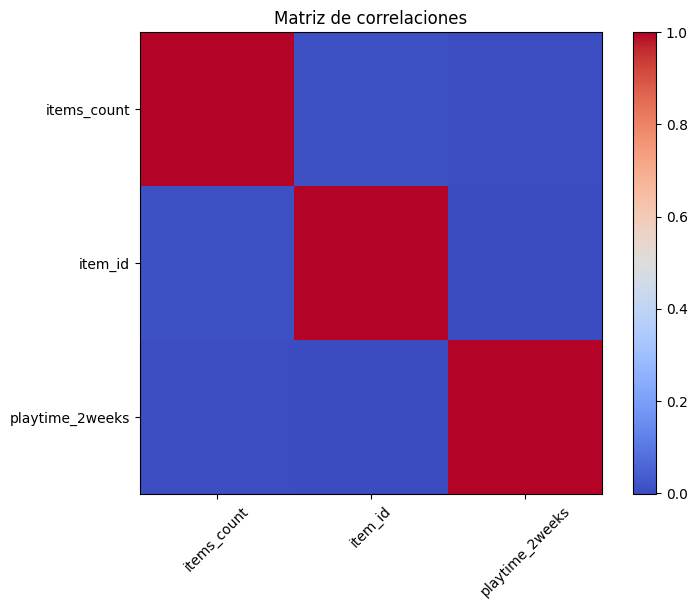

In [34]:
# Selecciono las variables numéricas del dataframe df_users_items para hacer la matriz de correlación
numeric_columns = df_users_items.select_dtypes(include=['float64', 'int64'])

# Calculo la matriz de correlación
correlation_matrix = numeric_columns.corr()

# Visualizo la matriz de correlación como un mapa de calor
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Matriz de correlaciones')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()


Distribución de juegos por año

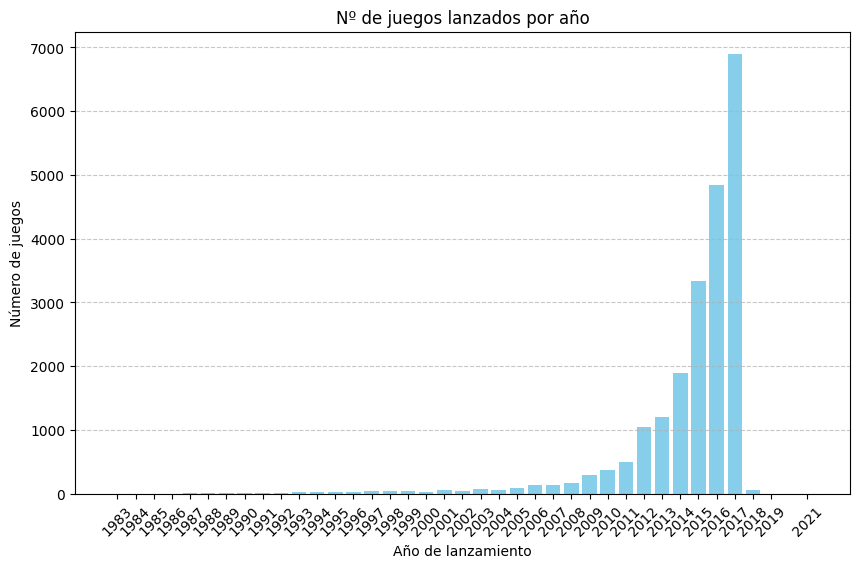

In [35]:
# Cuento el número de juegos por año de lanzamiento
games_by_year = df_steam_games['release_year'].value_counts().sort_index()

# Creo el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(games_by_year.index, games_by_year.values, color='skyblue')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Número de juegos')
plt.title('Nº de juegos lanzados por año')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(games_by_year.index, rotation=45)
plt.show()


Cantidad de juegos por género

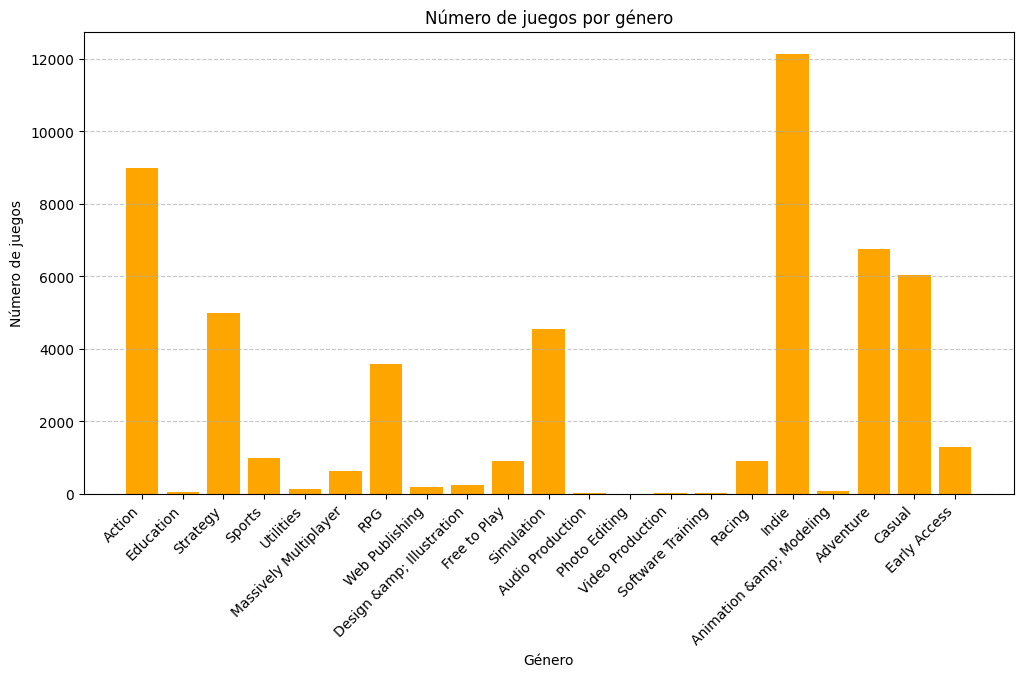

In [39]:
# Creo una lista de todos los géneros presentes en el conjunto de datos
all_genres = []
for genres_list in df_steam_games['genres']:
    all_genres.extend(genres_list)
unique_genres = list(set(all_genres))

# Cuento la cantidad de juegos por género
games_by_genre = {}
for genre in unique_genres:
    games_by_genre[genre] = sum(df_steam_games['genres'].apply(lambda x: genre in x))

# Creo el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(games_by_genre.keys(), games_by_genre.values(), color='orange')
plt.xlabel('Género')
plt.ylabel('Número de juegos')
plt.title('Número de juegos por género')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Cantidad de juegos por empresa desarrolladora

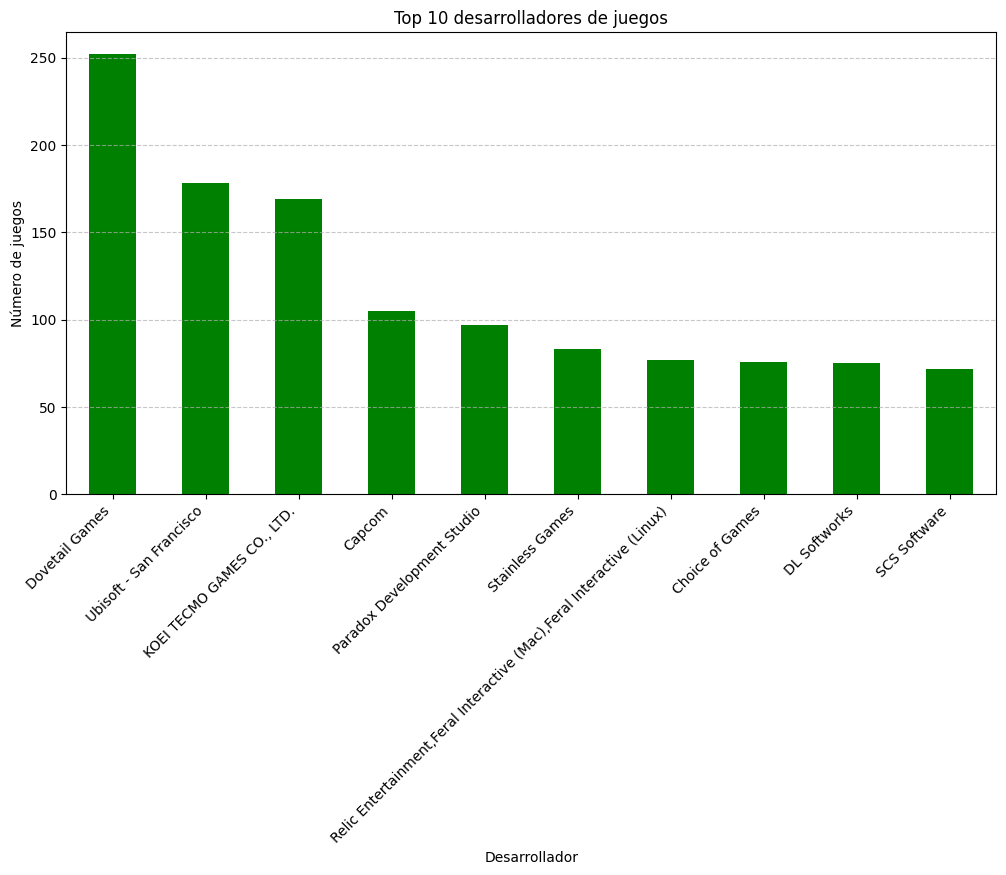

In [40]:
# Cuento la cantidad de juegos por empresa desarrolladora
developer_counts = df_steam_games['developer'].value_counts()

# Selecciono las 10 empresas desarrolladoras con más juegos
top_developers = developer_counts.head(10)

# Creo el gráfico de barras
plt.figure(figsize=(12, 6))
top_developers.plot(kind='bar', color='green')
plt.xlabel('Desarrollador')
plt.ylabel('Número de juegos')
plt.title('Top 10 desarrolladores de juegos')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Los 10 juegos más jugados

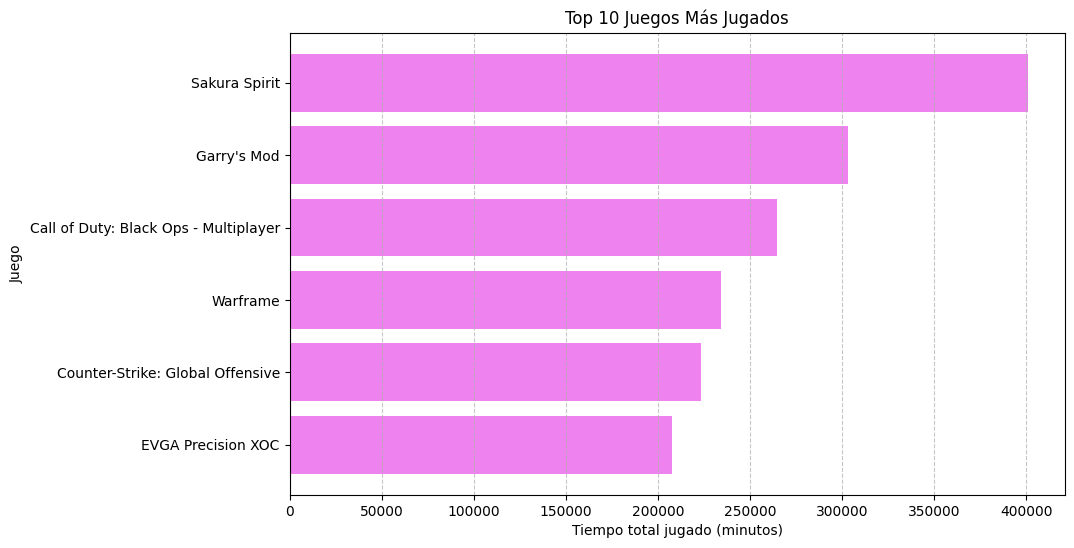

In [45]:
# Ordeno el dataframe por la columna 'playtime_forever' de manera descendente
top_played_games = df_users_items.sort_values(by='playtime_forever', ascending=False)

# Selecciono los diez juegos más jugados
top_10_played_games = top_played_games.head(10)

# Creo el gráfico de barras horizontal
plt.figure(figsize=(10, 6))
plt.barh(top_10_played_games['item_name'], top_10_played_games['playtime_forever'], color='violet')
plt.xlabel('Tiempo total jugado (minutos)')
plt.ylabel('Juego')
plt.title('Top 10 Juegos Más Jugados')
plt.gca().invert_yaxis()  
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


Los 10 juegos más vendidos

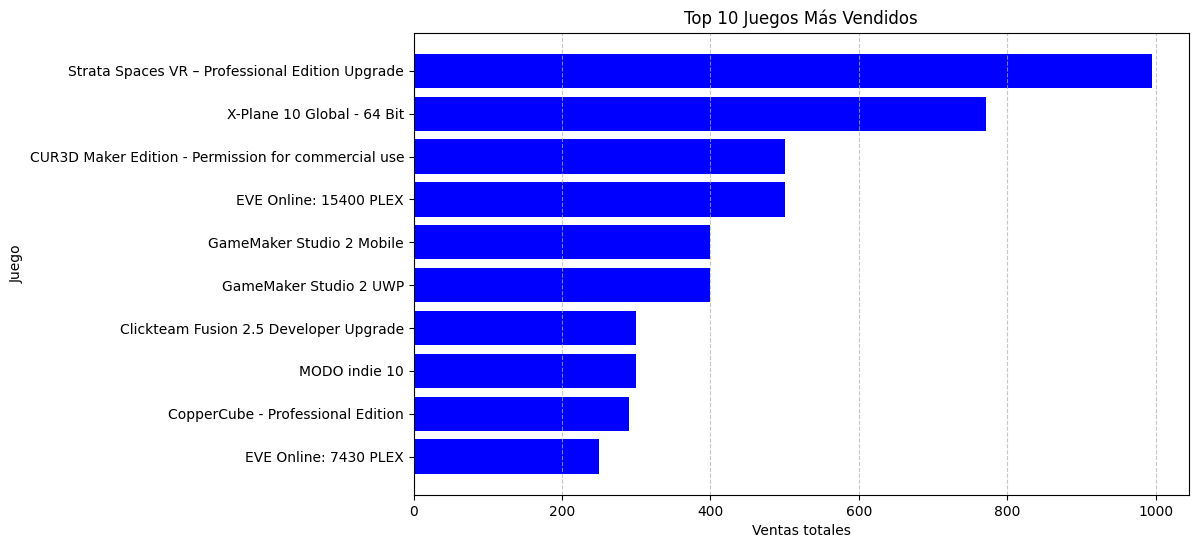

In [48]:
# Agrupar el DataFrame por el nombre del juego y sumar las ventas
top_sold_games = df_steam_games.groupby('app_name')['price'].sum()

# Seleccionar los diez juegos más vendidos
top_10_sold_games = top_sold_games.sort_values(ascending=False).head(10)

# Crear el gráfico de barras horizontal
plt.figure(figsize=(10, 6))
plt.barh(top_10_sold_games.index, top_10_sold_games.values, color='blue')
plt.xlabel('Ventas totales')
plt.ylabel('Juego')
plt.title('Top 10 Juegos Más Vendidos')
plt.gca().invert_yaxis()  # Invertir el eje y para que el juego con más ventas esté en la parte superior
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()